In [140]:
import pandas as pd
import numpy as np

In [141]:
df = pd.read_csv('../data/stocks_quarterly.csv')

In [142]:
df2 = pd.read_csv('../data/new_data_test.csv')

In [143]:
df = pd.concat([df,df2])

In [145]:
cols_to_drop = df.isnull().mean().sort_values(ascending = False).head(45).index

In [146]:
cols_to_drop = list(cols_to_drop) + ['fiscalDateEnding','reportedDate','price','nasd_price',\
                                     'next_year_date','next_year_price','nasd_ny_price','symbol',\
                                     'Nasdaq_Performance', 'Stock_Performance']

In [147]:
df.drop(columns = cols_to_drop, inplace = True)

In [62]:
columns = list(df.columns[0:-1])

In [63]:
for column_1 in columns:
    columns.remove(column_1)
    for column_2 in columns:
        if column_1 != column_2:
            df[column_1[0:4]+'_'+column_2[0:4]]=round((df[column_1]/df[column_2])-1,4)


/var/folders/6h/whx9z2p92kv86dyb6qfyqbzm0000gn/T/ipykernel_55206/3864096548.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_1[0:4]+'_'+column_2[0:4]]=round((df[column_1]/df[column_2])-1,4)


In [64]:
for i in range(100):
    df['canarito_'+ str(i)]= np.random.uniform(size=len(df))


/var/folders/6h/whx9z2p92kv86dyb6qfyqbzm0000gn/T/ipykernel_55206/2998966907.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['canarito_'+ str(i)]= np.random.uniform(size=len(df))


In [65]:
df = df.replace(np.inf,0).replace(-(np.inf),0).astype('float32')

In [66]:
df.to_csv('featured_df.csv', index = False)

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from bayes_opt.util import load_logs

In [ ]:
new_optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={"x": (-2, 2), "y": (-2, 2)},
    verbose=2,
    random_state=7,
)
print(len(new_optimizer.space))

In [ ]:
load_logs(new_optimizer, logs=["./logs.json"]);

In [ ]:
print("New optimizer is now aware of {} points.".format(len(new_optimizer.space)))


In [75]:
import json
from pprint import pprint

with open('logs.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

    print(data)

[{'target': 0.6715020576131687, 'params': {'max_depth': 40.72933172464178, 'max_features': 0.6536768062254503, 'min_samples_leaf': 5.501821912056916, 'min_samples_split': 19.84860600913046, 'n_estimators': 314.1905651663334}, 'datetime': {'datetime': '2022-03-10 15:45:24', 'elapsed': 0.0, 'delta': 0.0}}, {'target': 0.6726337448559669, 'params': {'max_depth': 104.5124992760864, 'max_features': 0.2615328472698803, 'min_samples_leaf': 5.015975279687064, 'min_samples_split': 2.8236629605412755, 'n_estimators': 112.44454040900587}, 'datetime': {'datetime': '2022-03-10 15:45:55', 'elapsed': 30.464477, 'delta': 30.464477}}, {'target': 0.6667695473251029, 'params': {'max_depth': 105.11980872275885, 'max_features': 0.6646036833926185, 'min_samples_leaf': 3.5126632745488413, 'min_samples_split': 3.060434992709828, 'n_estimators': 113.25789661402767}, 'datetime': {'datetime': '2022-03-10 15:47:19', 'elapsed': 114.826536, 'delta': 84.362059}}]


In [80]:
data[2]

{'target': 0.6667695473251029,
 'params': {'max_depth': 105.11980872275885,
  'max_features': 0.6646036833926185,
  'min_samples_leaf': 3.5126632745488413,
  'min_samples_split': 3.060434992709828,
  'n_estimators': 113.25789661402767},
 'datetime': {'datetime': '2022-03-10 15:47:19',
  'elapsed': 114.826536,
  'delta': 84.362059}}

In [149]:
df = df.fillna(0)


In [121]:
df.shape

(9929, 47)

In [119]:
df.shape

(9929, 47)

In [124]:
values.shape

(9929, 1176)

In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
data_projected = pca.fit_transform(df)

In [132]:
data_projected.shape

(9929, 10)

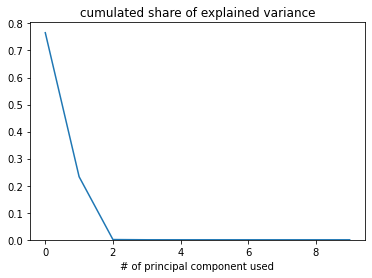

In [151]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [135]:
pca[0]

TypeError: 'PCA' object is not subscriptable

In [152]:
pd.DataFrame(data_projected)

,0,1,2,3,4,5,6,7,8,9
0,-7.286114e+12,-4.079394e+12,-1.406434e+12,-8.903392e+10,1.172102e+11,1.339288e+10,4.037616e+10,2.618071e+09,2.555557e+10,7.625758e+09
1,-7.285708e+12,-4.078398e+12,-1.402029e+12,-5.997122e+10,9.644481e+10,1.798111e+10,2.576581e+10,-1.506156e+09,2.092237e+10,1.158844e+10
2,-7.286743e+12,-4.077190e+12,-1.401275e+12,-6.064926e+10,9.548847e+10,1.838613e+10,2.370169e+10,-3.442498e+09,1.958732e+10,1.306799e+10
3,-7.283646e+12,-4.081566e+12,-1.410990e+12,-5.883616e+10,9.895419e+10,1.448598e+10,2.117744e+10,-4.270075e+09,1.575800e+10,1.627414e+10
4,-7.288212e+12,-4.081543e+12,-1.405019e+12,-5.916819e+10,9.707359e+10,1.353784e+10,2.390299e+10,-4.842051e+09,1.439757e+10,1.498659e+10
...,...,...,...,...,...,...,...,...,...,...
10851,-7.290159e+12,-4.084450e+12,-1.510570e+12,-1.094977e+11,1.259945e+11,1.937537e+10,2.464168e+10,-1.380977e+10,-4.455479e+08,1.623577e+10
10852,-7.290158e+12,-4.084451e+12,-1.510572e+12,-1.094999e+11,1.259978e+11,1.937711e+10,2.464186e+10,-1.381218e+10,-4.453757e+08,1.623517e+10
10853,-7.290158e+12,-4.084451e+12,-1.510572e+12,-1.095000e+11,1.259982e+11,1.937702e+10,2.464184e+10,-1.381226e+10,-4.452713e+08,1.623542e+10
10854,-7.290158e+12,-4.084451e+12,-1.510572e+12,-1.095011e+11,1.259972e+11,1.937622e+10,2.464142e+10,-1.380948e+10,-4.457600e+08,1.623572e+10


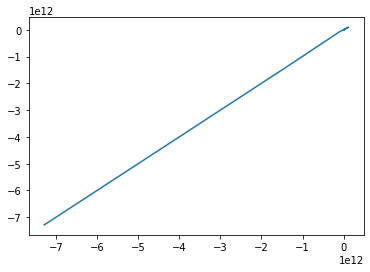

In [155]:
plt.plot(data_projected[0],data_projected[1])

In [156]:
df.Label.shape

(10856,)